In [1]:
import os
import sys
sys.path.append('..')
import pandas as pd
from wildlife_datasets import analysis, datasets, loader, splits
from wildlife_datasets.analysis import display_statistics
from wildlife_datasets.splits import visualize_split
from data.wildlife_dataset import WildlifeDataModule
from data.raptors_wildlife import Raptors


In [2]:
root = '/Users/amee/Documents/code/master-thesis/datasets/'
path_raptors = os.path.join(root, 'raptor_individuals_cropped')

dataset_raptors = Raptors(path_raptors)
data_raptors = WildlifeDataModule(
                            metadata=dataset_raptors.df,
                            data_dir=path_raptors, 
                            preprocess_lvl=2,
                            batch_size=4, 
                            cache_path="/Users/amee/Documents/code/master-thesis/EagleID/dataset/dataframe/cache_raptors_split.csv", # METADATA SPLIT
                            animal_cat="bird", 
                            splitter ='metadata_split',  # METADATA SPLIT BC ALREADY SPLIT BEFORE
                            only_cache=True,
                            wildlife_names='raptors',
                            precompute=True,
                          )

Loading from cache only...
Dataset size before pre-processing and cleaning: 509
Removed 0 rows with invalid segmentation data.
Index(['image_id', 'species', 'identity_id', 'identity', 'path', 'from_video',
       'video', 'date', 'segmentation', 'height', 'width', 'bbox', 'area',
       'iscrowd', 'keypoints', 'num_keypoints', 'orientation', 'query',
       'metadata_split'],
      dtype='object')
   image_id species  identity_id      identity  \
0        26  whteag          3.0  England_G274   
1        22  whteag          3.0  England_G274   
2        28  whteag          3.0  England_G274   
3        18  whteag          3.0  England_G274   
4        40  whteag          3.0  England_G274   

                                               path  from_video  video  date  \
0  whteag/England_G274/Aug2020-G274catchingfish.jpg       False    NaN  2020   
1    whteag/England_G274/Jan2021-G274 Preenin_9.png       False    NaN  2021   
2           whteag/England_G274/Aug2020-G274 _5.png       

/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../data/wildlife_dataset.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['query'] = df_test['query'].astype(bool)


Loaded mask cache from ../dataset/data_cache/train_raptors_mask.npz: Masks count: 382
Loaded primary cache from ../dataset/data_cache/train_raptors_mask.npz: Mask: 382
Precomputed data loaded from bbox_mask for train_raptors. Only to be used for processing lvl 2-5
Precomputed data loaded:
length of metadata: 382
first 5 rows of metadata:
   image_id species  identity_id         identity  \
0       271  goleag         33.0  Alabama_natchez   
1       273  goleag         33.0  Alabama_natchez   
2       274  goleag         33.0  Alabama_natchez   
3       282  goleag         36.0  Bernheim_athena   
4       283  goleag         36.0  Bernheim_athena   

                                                path  from_video  video  date  \
0        goleag/Alabama_natchez/bostonmmountains.jpg       False    NaN  2000   
1           goleag/Alabama_natchez/mfdc6688_crop.jpg       False    NaN  2000   
2                 goleag/Alabama_natchez/Natchez.jpg       False    NaN  2000   
3  goleag/Bernhei

In [ ]:
# raptors = RaptorsWildlife(root=root)
# ds = raptors.wildlife_dataset()
# df = ds.df
# df

In [3]:
df_train = data_raptors.train_dataset.metadata
df_val_query = data_raptors.val_query_dataset.metadata
df_val_gallery = data_raptors.val_gallery_dataset.metadata

In [4]:
df_val = pd.concat([df_val_query, df_val_gallery], ignore_index=True)
df_all = pd.concat([df_train, df_val_query, df_val_gallery], ignore_index=True)

In [5]:
df_all.head()

,image_id,species,identity_id,identity,path,from_video,video,date,segmentation,height,width,bbox,area,iscrowd,keypoints,num_keypoints,orientation,query,metadata_split
0,271,goleag,33.0,Alabama_natchez,goleag/Alabama_natchez/bostonmmountains.jpg,False,NaN,2000,"[[324.77813720703125, 77.23750305175781, 323.7...",386.0,686.0,"[107.1875, 77.23750305175781, 525.21875, 306.5...",116883.0,0.0,"[341, 89, 2, 295, 155, 2, 290, 155, 2, 177, 23...",23.0,NaN,0,train
1,273,goleag,33.0,Alabama_natchez,goleag/Alabama_natchez/mfdc6688_crop.jpg,False,NaN,2000,"[[101.9078140258789, 13.087499618530273, 101.3...",111.0,377.0,"[14.137499809265137, 13.087499618530273, 351.6...",14152.0,0.0,"[190, 41, 2, 197, 44, 2, 186, 41, 2, 193, 55, ...",23.0,NaN,0,train
2,274,goleag,33.0,Alabama_natchez,goleag/Alabama_natchez/Natchez.jpg,False,NaN,2000,"[[1027.6500244140625, 265.1999816894531, 1025....",1224.0,1632.0,"[387.6000061035156, 265.1999816894531, 1241.84...",1008001.0,0.0,"[1029, 288, 2, 873, 528, 2, 861, 528, 2, 430, ...",23.0,NaN,0,train
3,282,goleag,36.0,Bernheim_athena,goleag/Bernheim_athena/Athena_June2023-scaled.png,False,NaN,2023,"[[256.1062316894531, 20.749998092651367, 253.1...",277.0,628.0,"[39.25, 20.749998092651367, 560.2937622070312,...",64045.0,0.0,"[97, 51, 2, 86, 78, 2, 86, 83, 2, 48, 83, 2, 8...",23.0,NaN,0,train
4,283,goleag,36.0,Bernheim_athena,goleag/Bernheim_athena/Athenajan_2023.png,False,NaN,2023,"[[730.25, 166.60000610351562, 727.075012207031...",1146.0,2032.0,"[177.8000030517578, 166.60000610351562, 1539.8...",1101711.0,0.0,"[773, 186, 2, 1044, 487, 2, 1059, 502, 2, 1645...",23.0,NaN,0,train


In [7]:
import pandas as pd

# Assuming df is your DataFrame
# Example: df = pd.read_csv("your_file.csv")

# Count of each species (total rows/images per species)
species_counts = df_all['species'].value_counts()

# Count of unique identities per species
identity_counts = df_all.groupby('species')['identity_id'].nunique()

# Display results
print("Image count per species:\n", species_counts)
print("\nUnique identity count per species:\n", identity_counts)


Image count per species:
 species
goleag    242
baleag    119
whteag    117
osprey     31
Name: count, dtype: int64

Unique identity count per species:
 species
baleag    10
goleag    38
osprey     7
whteag    14
Name: identity_id, dtype: int64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a consistent and professional color palette
colors = {
    "train": "#1f77b4",       # blue
    "val_query": "#ff7f0e",   # orange
    "val_gallery": "#2ca02c"  # green
}

# Set global matplotlib aesthetics
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 12,
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.linestyle": "--",
    "grid.alpha": 0.3
})

sns.set_style("whitegrid")


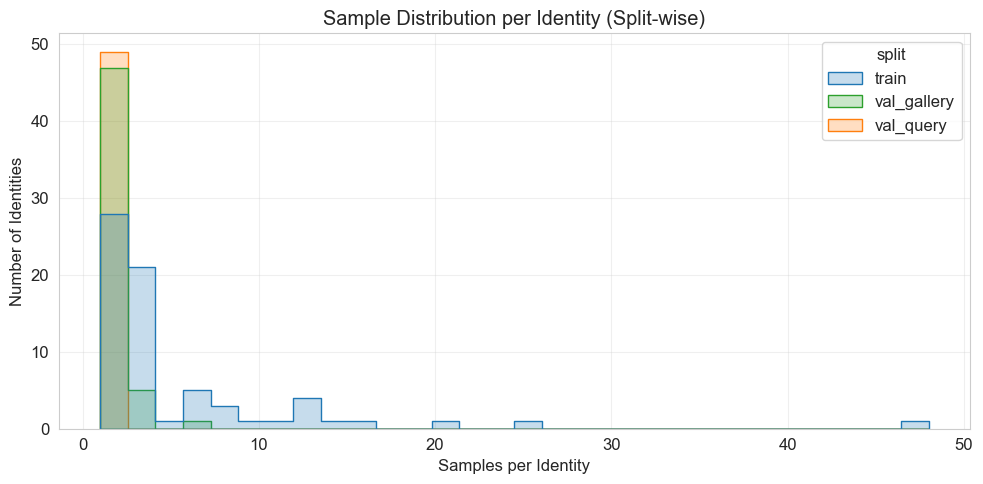

In [19]:
import pandas as pd

# Add split labels
df_train['split'] = 'train'
df_val_query['split'] = 'val_query'
df_val_gallery['split'] = 'val_gallery'

df_all = pd.concat([df_train, df_val_query, df_val_gallery], ignore_index=True)

# Count samples per identity per split
identity_counts = df_all.groupby(['split', 'identity_id']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(data=identity_counts, x='count', hue='split', bins=30,
             palette=colors, element='step', common_norm=False)
plt.xlabel("Samples per Identity")
plt.ylabel("Number of Identities")
plt.title("Sample Distribution per Identity (Split-wise)")
plt.grid(True)
plt.tight_layout()
plt.show()



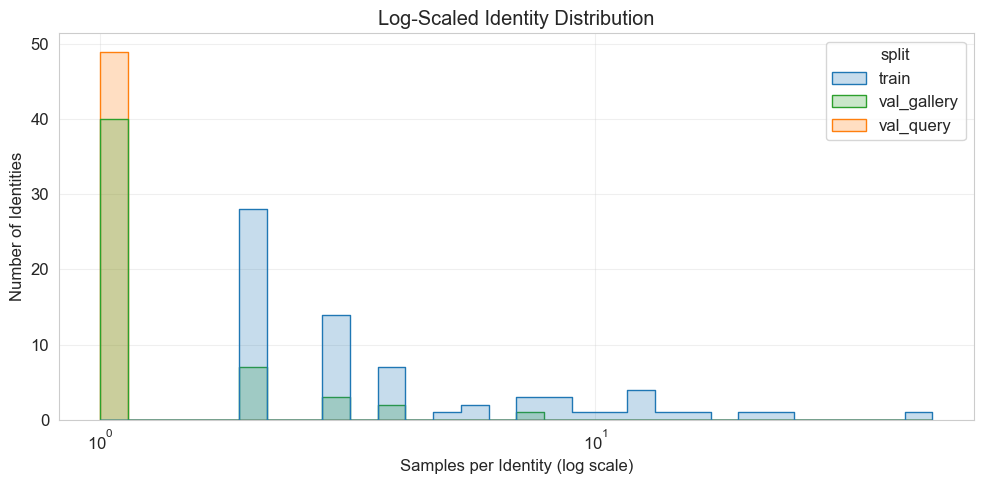

In [20]:

plt.figure(figsize=(10, 5))
sns.histplot(data=identity_counts, x='count', hue='split', bins=30,
             palette=colors, element='step', common_norm=False, log_scale=True)

plt.xlabel("Samples per Identity (log scale)")
plt.ylabel("Number of Identities")
plt.title("Log-Scaled Identity Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

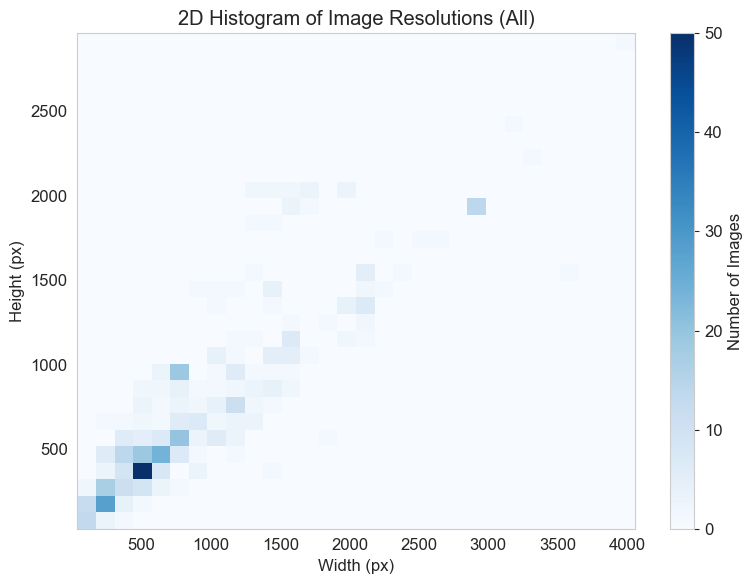

In [25]:
plt.figure(figsize=(8, 6))
plt.hist2d(df_all['width'], df_all['height'], bins=(30, 30), cmap='Blues')
plt.colorbar(label='Number of Images')
plt.title("2D Histogram of Image Resolutions (All)")
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


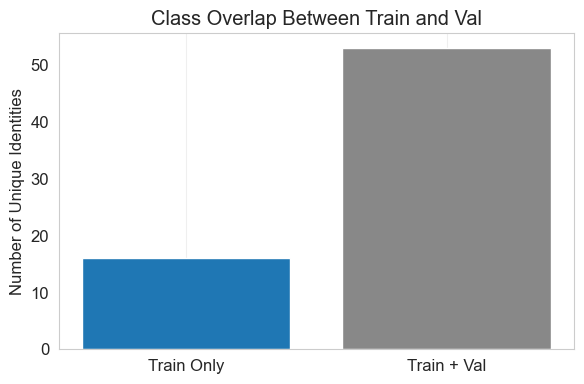

In [20]:
train_ids = set(df_train['identity_id'].unique())
val_query_ids = set(df_val_query['identity_id'].unique())
val_gallery_ids = set(df_val_gallery['identity_id'].unique())

overlap_train_val = len(train_ids & (val_query_ids | val_gallery_ids))
only_train = len(train_ids - val_query_ids - val_gallery_ids)

plt.figure(figsize=(6, 4))
bars = plt.bar(["Train Only", "Train + Val"], [only_train, overlap_train_val], color=[colors['train'], "#888888"])
plt.ylabel("Number of Unique Identities")
plt.title("Class Overlap Between Train and Val")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


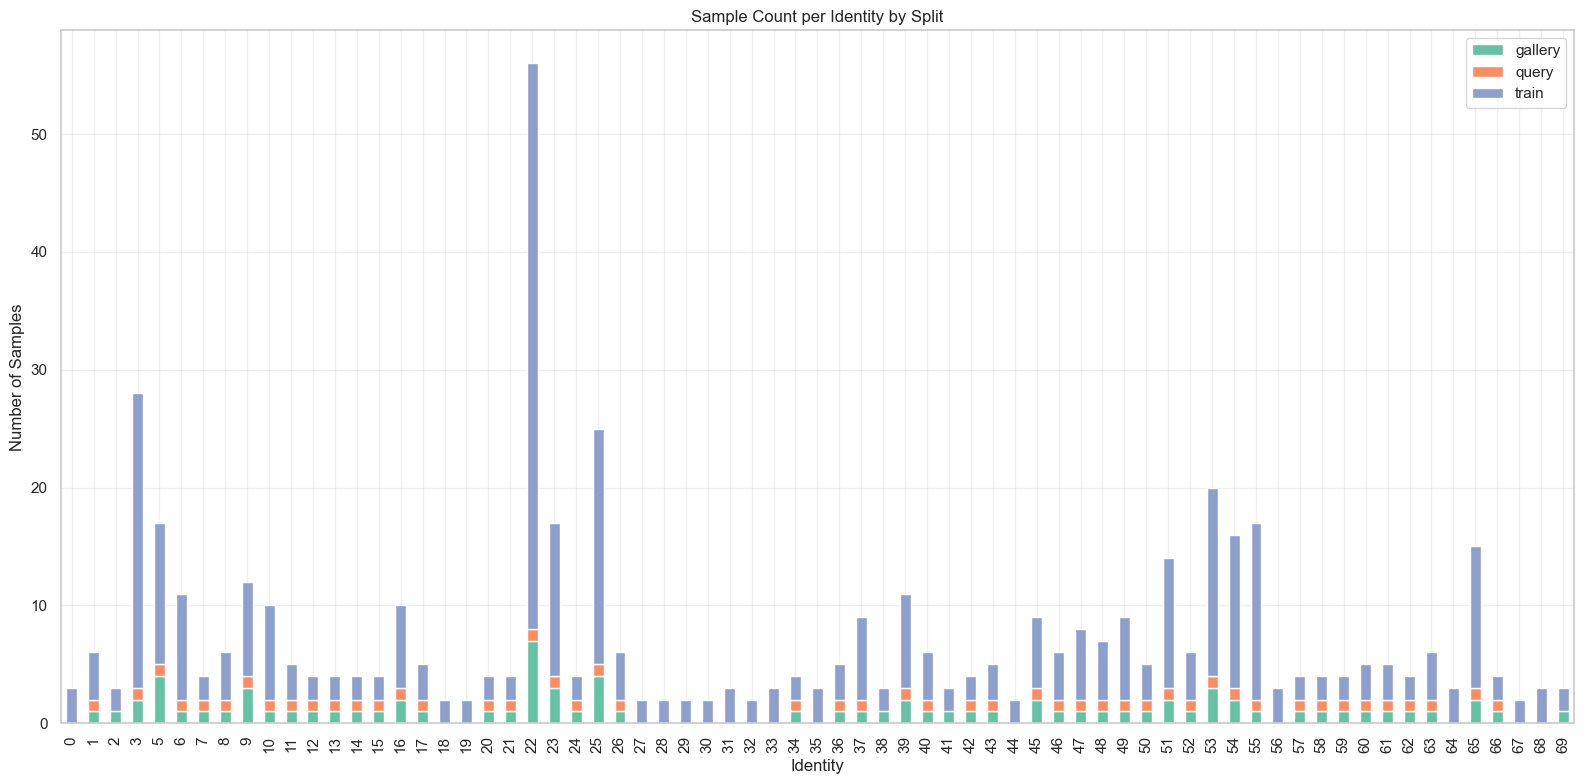

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Add a 'split' column to each DataFrame
df_train = df_train.copy()
df_train['split'] = 'train'

df_val_query = df_val_query.copy()
df_val_query['split'] = 'query'

df_val_gallery = df_val_gallery.copy()
df_val_gallery['split'] = 'gallery'

# Combine all
df_all = pd.concat([df_train, df_val_query, df_val_gallery], ignore_index=True)
df_all['identity_id'] = df_all['identity_id'].astype(int)  # Ensure identity_id is string for better plotting

# Pivot data for stacked bar
counts = df_all.groupby(['identity_id', 'split']).size().unstack(fill_value=0)

# Plot
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # train, val_query, val_gallery

counts.plot(kind='bar', stacked=True, color=colors, figsize=(16, 8))

plt.title("Sample Count per Identity by Split")
plt.xlabel("Identity")
plt.ylabel("Number of Samples")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


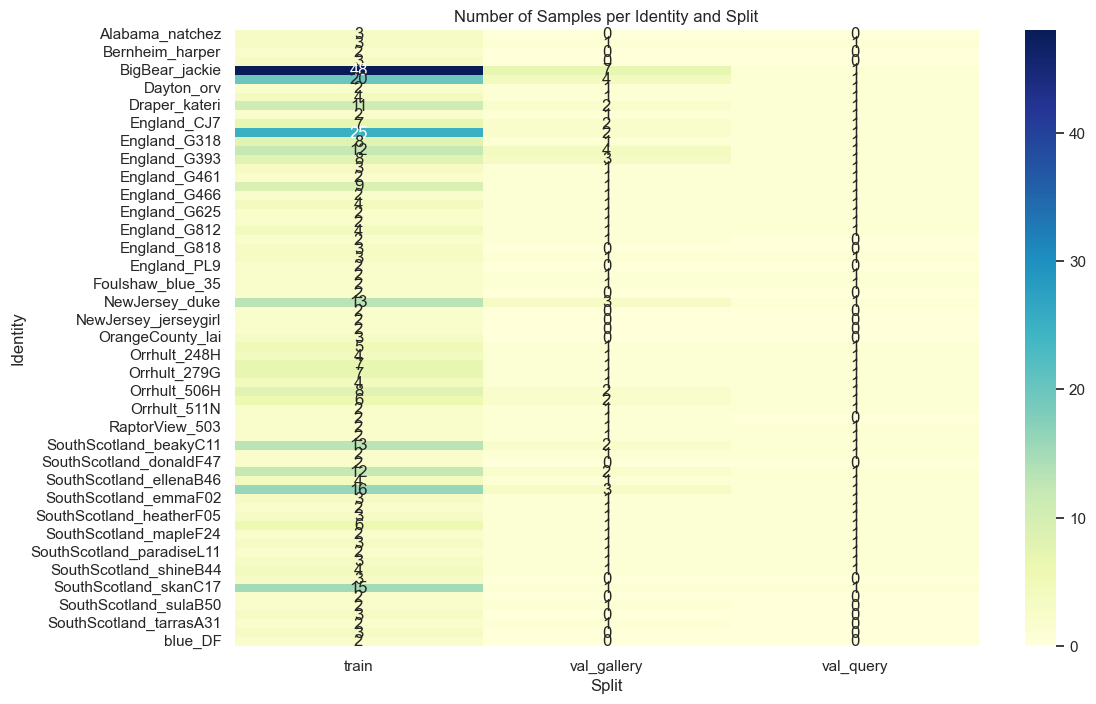

In [78]:
pivot = df_all.groupby(['identity', 'split']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Number of Samples per Identity and Split")
plt.xlabel("Split")
plt.ylabel("Identity")
plt.show()


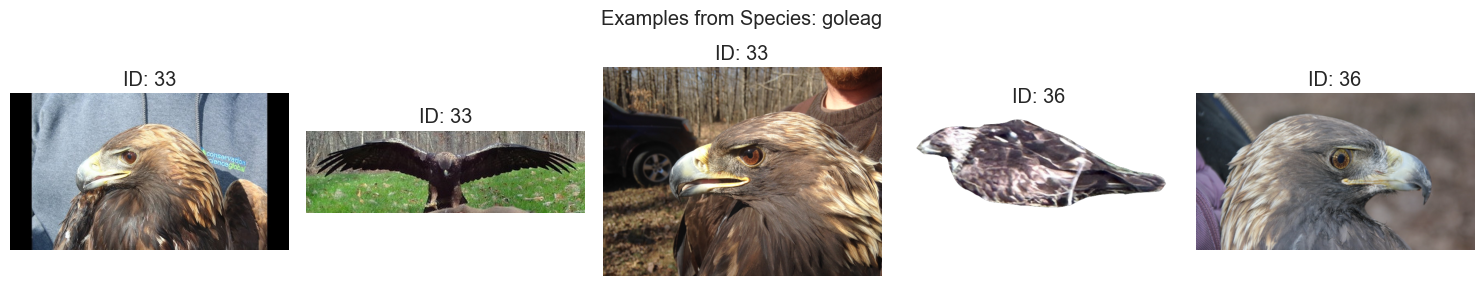

In [25]:
from PIL import Image
import os
from IPython.display import display
import matplotlib.pyplot as plt

def plot_thumbnails(df, species_name, n=5, root_folder="path/to/images"):
    subset = df[df['species'] == species_name].head(n)
    fig, axs = plt.subplots(1, n, figsize=(15, 3))
    for i, (_, row) in enumerate(subset.iterrows()):
        img_path = os.path.join(root_folder, row['path'])
        img = Image.open(img_path)
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f"ID: {int(row['identity_id'])}")
    plt.suptitle(f"Examples from Species: {species_name}")
    plt.tight_layout()
    plt.show()

# Example call
plot_thumbnails(df_train, 'goleag', n=5, root_folder=path_raptors)


In [9]:
from wildlife_datasets.analysis import display_statistics
from wildlife_datasets.splits import visualize_split

Number of identitites            69
Number of all animals            382
Number of animals with one image 0
Number of unidentified animals   0
Number of videos                 69
Images span                      0 days


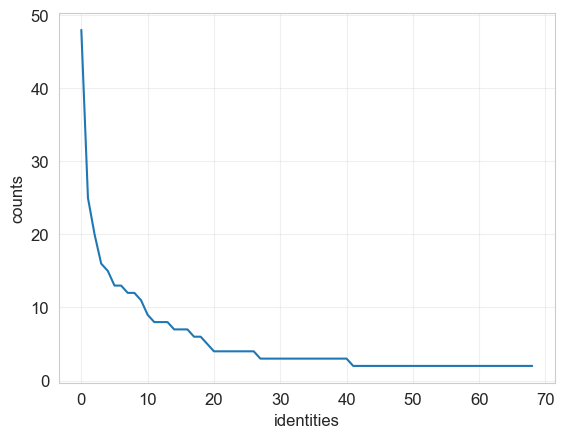

In [72]:
display_statistics(df_train)

Number of identitites            69
Number of all animals            509
Number of animals with one image 0
Number of unidentified animals   0
Number of videos                 69
Images span                      0 days


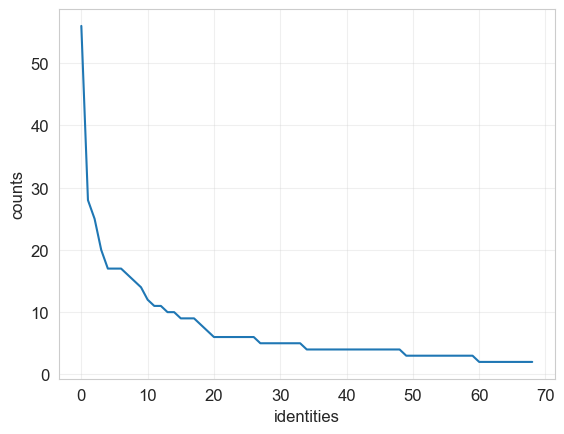

In [73]:
display_statistics(df_all)

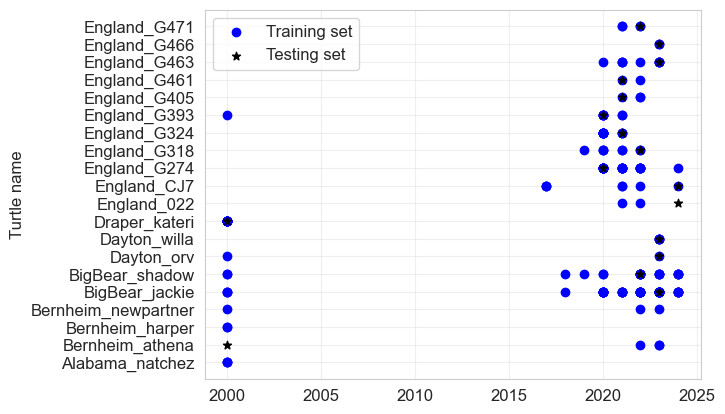

In [31]:
visualize_split(df_train, df_val_query, selection=20)

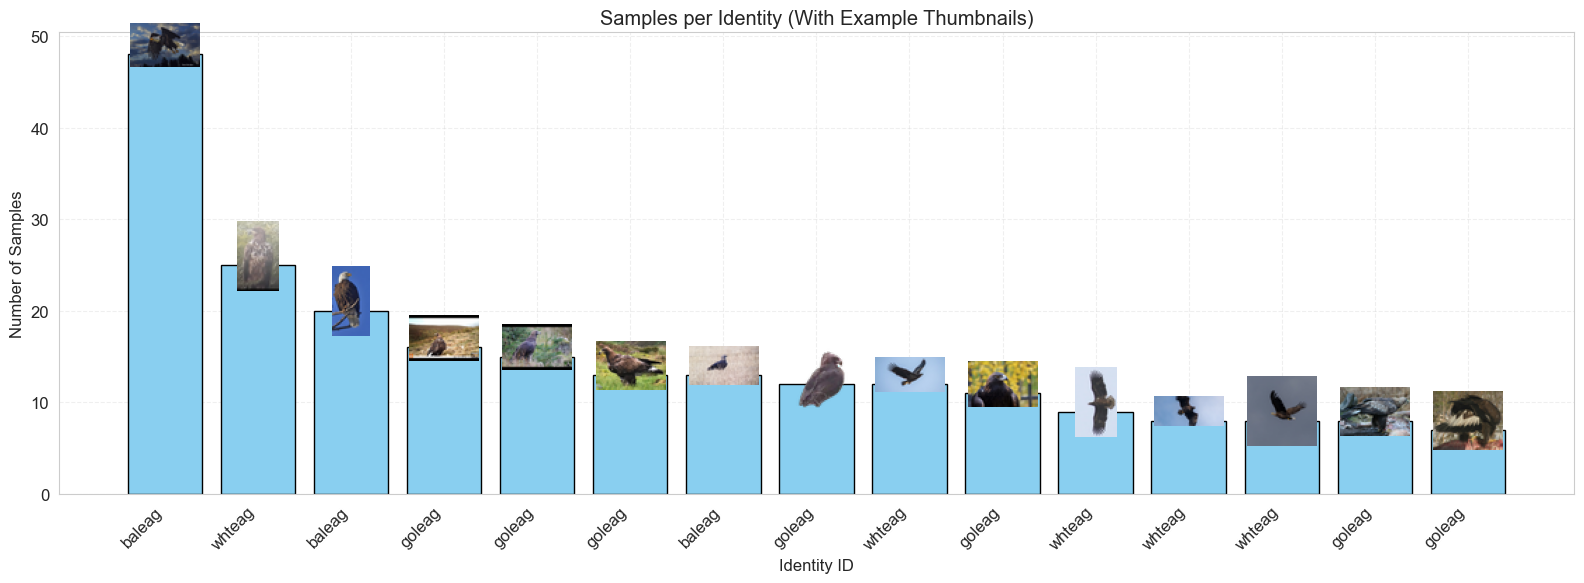

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Customize these paths
IMAGE_ROOT = path_raptors

# Group by identity
identity_summary = df_train.groupby(['identity_id', 'species']) \
    .agg({'image_id': 'count', 'path': 'first'}) \
    .reset_index().rename(columns={'image_id': 'count'})

# Sort by count
identity_summary = identity_summary.sort_values('count', ascending=False).head(15)

# Plot
fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(range(len(identity_summary)), identity_summary['count'], color="#89CFF0", edgecolor="black")

# Add thumbnails
for i, (idx, row) in enumerate(identity_summary.iterrows()):
    img_path = os.path.join(IMAGE_ROOT, row['path'])
    try:
        img = Image.open(img_path)
        img.thumbnail((50, 50), Image.Resampling.LANCZOS)
        imgbox = OffsetImage(img, zoom=1)
        ab = AnnotationBbox(imgbox, (i, row['count'] + 1), frameon=False)
        ax.add_artist(ab)
    except Exception as e:
        print(f"Could not load image for identity {row['identity_id']}: {e}")

# Aesthetics
ax.set_xticks(range(len(identity_summary)))
ax.set_xticklabels(identity_summary['species'], rotation=45, ha='right')

ax.set_xlabel("Identity ID")
ax.set_ylabel("Number of Samples")
ax.set_title("Samples per Identity (With Example Thumbnails)")
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


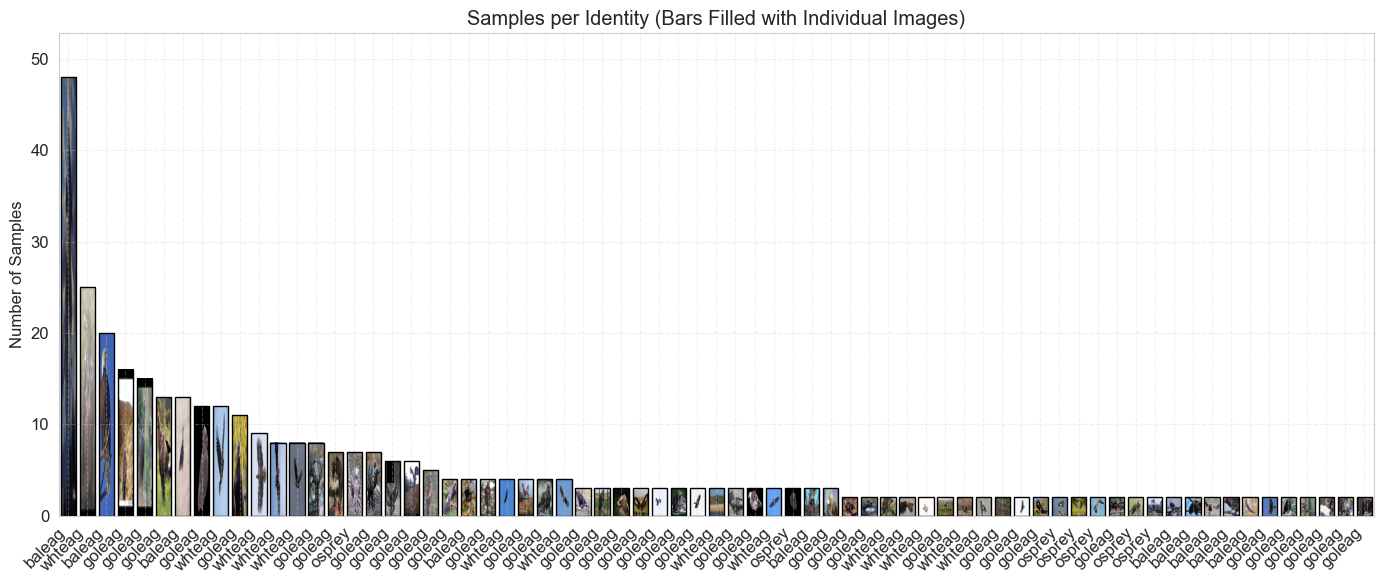

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image

# Data prep
identity_summary = df_train.groupby(['identity_id', 'species']) \
    .agg({'image_id': 'count', 'path': 'first'}) \
    .reset_index().rename(columns={'image_id': 'count'})

identity_summary = identity_summary.sort_values('count', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.8
x = np.arange(len(identity_summary))
counts = identity_summary['count'].values

# Plot empty bar outlines
for i, (count, row) in enumerate(zip(counts, identity_summary.itertuples())):
    # Draw bar outline
    ax.bar(i, count, width=bar_width, edgecolor='black', facecolor='none', linewidth=1)

    # Load image
    img_path = os.path.join(IMAGE_ROOT, row.path)
    try:
        img = Image.open(img_path).convert("RGB")
        # Resize to match bar width and height
        img = img.resize((100, 100))  # temporary size

        # Show image inside the bar using extent
        ax.imshow(img,
                  extent=(i - bar_width/2, i + bar_width/2, 0, count),
                  aspect='auto',
                  zorder=-1)
    except Exception as e:
        print(f"Could not load image for identity {row.identity_id}: {e}")

# Style axes
ax.set_xticks(x)
ax.set_xticklabels(identity_summary['species'], rotation=45, ha='right')
ax.set_ylabel("Number of Samples")
ax.set_title("Samples per Identity (Bars Filled with Individual Images)")
ax.set_xlim(-0.5, len(identity_summary) - 0.5)
ax.set_ylim(0, max(counts) * 1.1)
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


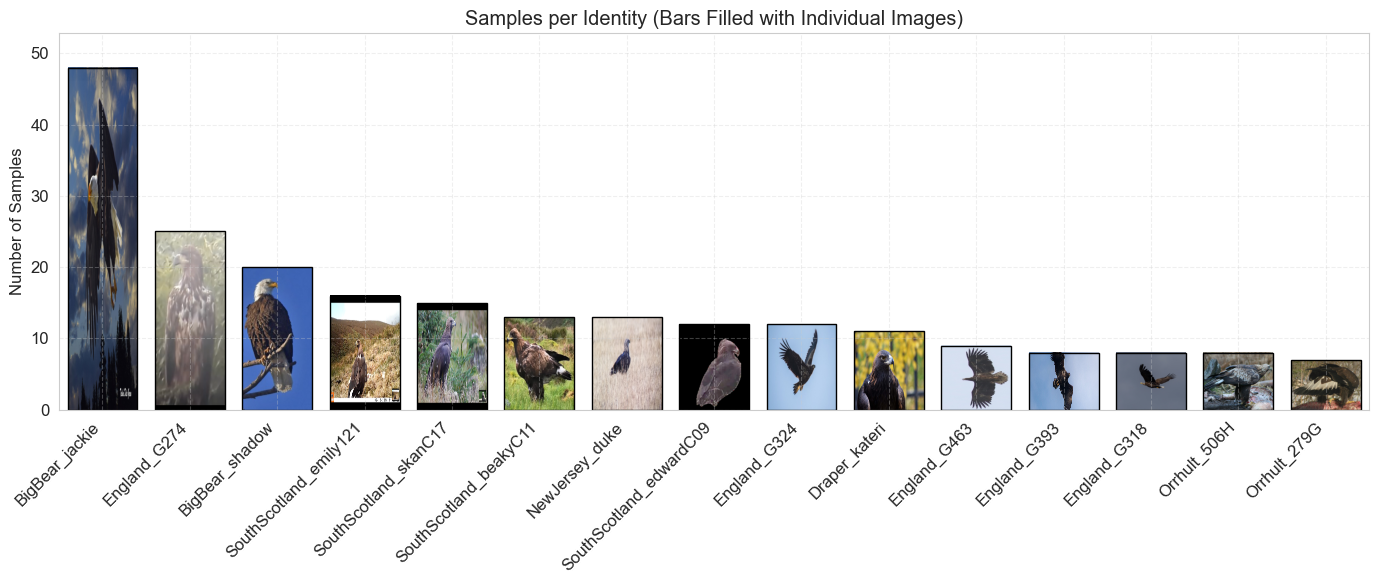

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image

# Merge identity name (e.g., "Alabama_natchez") from original df
identity_summary = df_train.groupby(['identity_id']) \
    .agg({
        'image_id': 'count',
        'path': 'first',
        'identity': 'first'  # <- identity name
    }) \
    .reset_index().rename(columns={'image_id': 'count'})

# Sort and select top N
identity_summary = identity_summary.sort_values('count', ascending=False).head(15).reset_index(drop=True)

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.8
x = np.arange(len(identity_summary))
counts = identity_summary['count'].values

for i, (count, row) in enumerate(zip(counts, identity_summary.itertuples())):
    # Draw bar outline
    ax.bar(i, count, width=bar_width, edgecolor='black', facecolor='none', linewidth=1)

    # Load and place image inside bar
    img_path = os.path.join(IMAGE_ROOT, row.path)
    try:
        img = Image.open(img_path).convert("RGB")
        ax.imshow(img,
                  extent=(i - bar_width / 2, i + bar_width / 2, 0, count),
                  aspect='auto',
                  zorder=-1)
    except Exception as e:
        print(f"Could not load image for identity {row.identity_id}: {e}")

# X-axis: use 'identity' names instead of species
ax.set_xticks(x)
ax.set_xticklabels(identity_summary['identity'], rotation=45, ha='right')

# Labels and style
ax.set_ylabel("Number of Samples")
ax.set_title("Samples per Identity (Bars Filled with Individual Images)")
ax.set_xlim(-0.5, len(identity_summary) - 0.5)
ax.set_ylim(0, max(counts) * 1.1)
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


In [47]:
# Group by identity_id to count how many samples each individual has
sample_counts = df_train.groupby('identity_id').size()

# Filter individuals with fewer than 10 samples
low_sample_individuals = sample_counts[sample_counts < 10]

# Output the count
print(f"Number of individuals with fewer than 10 samples: {len(low_sample_individuals)}")

# # (Optional) Display those identities and their sample counts
# print(low_sample_individuals)


Number of individuals with fewer than 10 samples: 59


--- Top 15 Identities to Plot ---
    identity_id                 identity  count
0             1           BigBear_jackie     48
1             2             England_G274     25
2             3           BigBear_shadow     20
3             4   SouthScotland_emily121     16
4             5    SouthScotland_skanC17     15
5             6   SouthScotland_beakyC11     13
6             7           NewJersey_duke     13
7             8  SouthScotland_edwardC09     12
8             9             England_G324     12
9            10            Draper_kateri     11
10           11              Wyoming_ash     10
11           12             Wyoming_griz      9
12           13             Glacier_gwen      8
13           14             Glacier_finn      7
14           15              Alberta_bob      6


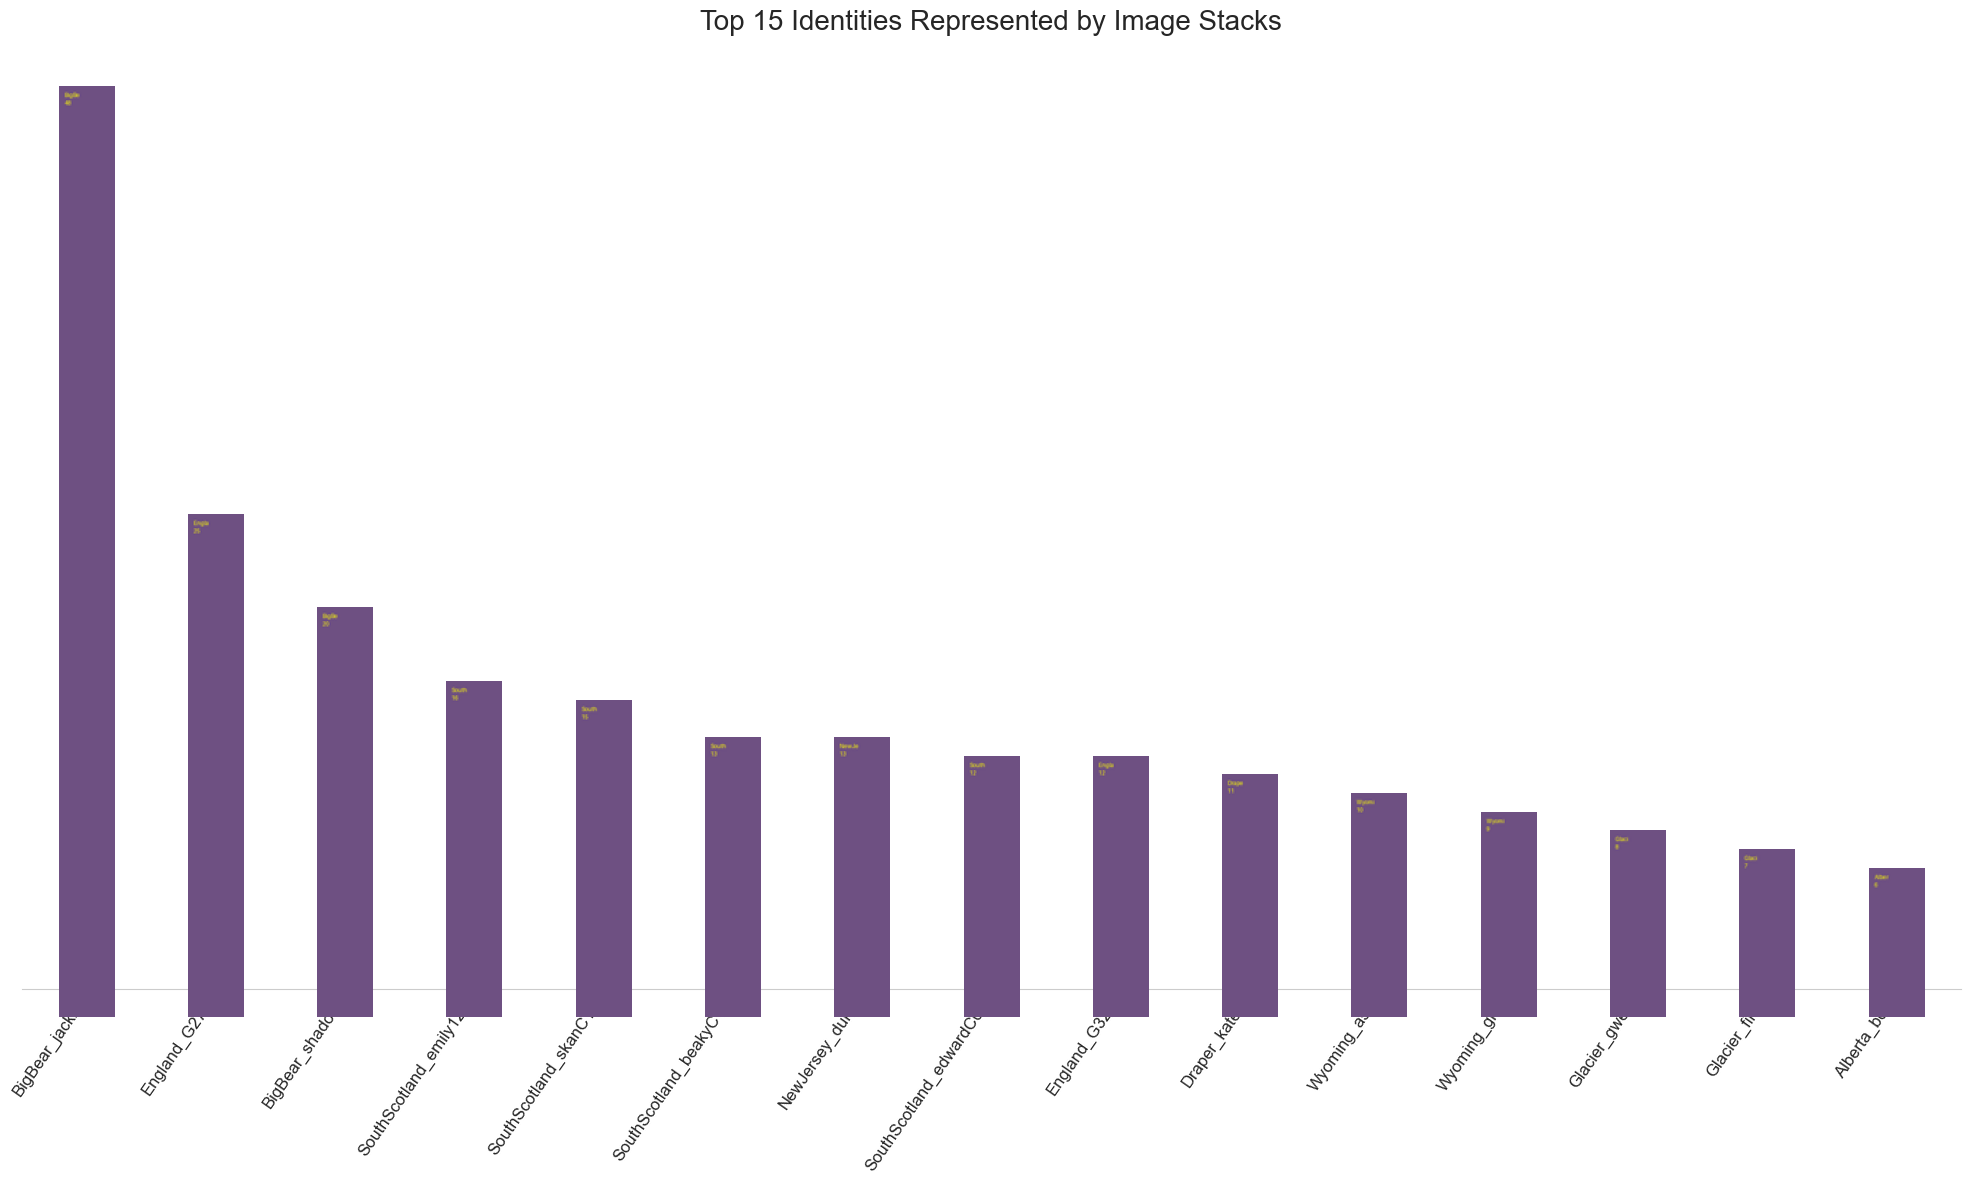


Chart saved as 'stacked_image_bar_chart_aggregated.png'


In [58]:
import os
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

# --- 1. Setup: Create a dummy DataFrame and placeholder images ---
# This section simulates your environment to match your data structure,
# including 'identity_id'.

# Create a directory for placeholder images
if not os.path.exists("placeholder_images"):
    os.makedirs("placeholder_images")

# Top 15 identities and their counts (expanded from the original 10)
top_identities_data = {
    'BigBear_jackie': (1, 48), 'England_G274': (2, 25), 'BigBear_shadow': (3, 20),
    'SouthScotland_emily121': (4, 16), 'SouthScotland_skanC17': (5, 15),
    'SouthScotland_beakyC11': (6, 13), 'NewJersey_duke': (7, 13),
    'SouthScotland_edwardC09': (8, 12), 'England_G324': (9, 12),
    'Draper_kateri': (10, 11), 'Wyoming_ash': (11, 10), 'Wyoming_griz': (12, 9),
    'Glacier_gwen': (13, 8), 'Glacier_finn': (14, 7), 'Alberta_bob': (15, 6)
}

# Create a dummy DataFrame and placeholder images
image_data = []
for identity, (identity_id, count) in top_identities_data.items():
    for i in range(count):
        img_path = os.path.join("placeholder_images", f"{identity}_{i}.png")
        image_data.append({
            'identity_id': identity_id,
            'identity': identity,
            'path': img_path,
            'image_id': f"{identity}_{i}" # Dummy image_id
        })

        # Create a simple placeholder image if it doesn't exist
        if not os.path.exists(img_path):
            try:
                font = ImageFont.truetype("arial.ttf", 10)
            except IOError:
                font = ImageFont.load_default()
            img = Image.new('RGB', (100, 100), color=(110, 80, 130))
            d = ImageDraw.Draw(img)
            d.text((10,10), f"{identity[:5]}\n{i+1}", fill=(255,255,0), font=font)
            img.save(img_path)

df_train = pd.DataFrame(image_data)

# --- 2. Data Processing (Using your provided method) ---
TOP_N = 15

# Group by identity_id to get counts and names
identity_summary = df_train.groupby(['identity_id']) \
    .agg({
        'image_id': 'count',
        'path': 'first',
        'identity': 'first'
    }) \
    .reset_index().rename(columns={'image_id': 'count'})

# Sort and select top N
identity_summary = identity_summary.sort_values('count', ascending=False).head(TOP_N).reset_index(drop=True)

print("--- Top 15 Identities to Plot ---")
print(identity_summary[['identity_id', 'identity', 'count']])


# --- 3. Image Processing Function (Unchanged) ---
def process_image(path, size=40):
    """
    Loads, center-crops, and resizes an image.
    """
    img = Image.open(path).convert("RGB")
    width, height = img.size
    short_dim = min(width, height)
    left = (width - short_dim) / 2
    top = (height - short_dim) / 2
    right = (width + short_dim) / 2
    bottom = (height + short_dim) / 2
    img_cropped = img.crop((left, top, right, bottom))
    img_resized = img_cropped.resize((size, size), Image.Resampling.LANCZOS)
    return img_resized


# --- 4. Chart Generation (Adapted to use identity_summary) ---
THUMBNAIL_HEIGHT_PX = 40

# Get the labels for the x-axis from the summary dataframe
labels = identity_summary['identity']

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12))

# Set the x-axis ticks and labels
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=55, ha='right', fontsize=12)

# Remove y-axis as the image stack itself represents the count
ax.set_yticks([])
ax.set_yticklabels([])

# Set plot limits and title
ax.set_xlim(-0.5, len(labels) - 0.5)
ax.set_ylim(0, identity_summary['count'].max() * THUMBNAIL_HEIGHT_PX + (THUMBNAIL_HEIGHT_PX * 2))
ax.set_title(f'Top {TOP_N} Identities Represented by Image Stacks', fontsize=20, pad=20)

# Main loop to create the stacked image bars
# We iterate through the identity_summary dataframe using iterrows()
for i, row in identity_summary.iterrows():
    identity_name = row['identity']

    # Get all image paths for the current identity from the original df_train
    image_paths = df_train[df_train['identity'] == identity_name]['path']

    y_offset = 0
    for img_path in image_paths:
        img_thumb = process_image(img_path, size=THUMBNAIL_HEIGHT_PX)
        imagebox = OffsetImage(img_thumb, zoom=1)
        ab = AnnotationBbox(imagebox, (i, y_offset), frameon=False, pad=0.0)
        ax.add_artist(ab)
        y_offset += THUMBNAIL_HEIGHT_PX

# Clean up plot aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)
plt.tight_layout()

# Save and show the plot
plt.savefig("stacked_image_bar_chart_aggregated.png", dpi=300)
plt.show()

print("\nChart saved as 'stacked_image_bar_chart_aggregated.png'")